# **2019 SHNW 16S v4 faecal microbiota analyses**



### *Raphael Eisenhofer, July 2020*

In [2]:
conda activate qiime2-2020.2

(qiime2-2020.2) 

: 1

In [3]:
cd  2019_SHNW_Gut/R1

(qiime2-2020.2) 

: 1

### First, let's import the reads into a qiime2 artefact:

In [7]:
qiime tools import \
--type SampleData[SequencesWithQuality] \
--input-path ../reads/R1 \
--input-format CasavaOneEightSingleLanePerSampleDirFmt \
--output-path demux-r1.qza 

Imported ../reads/R1 as CasavaOneEightSingleLanePerSampleDirFmt to demux-r1.qza
(qiime2-2020.2) 

: 1

In [8]:
qiime demux summarize \
--i-data demux-r1.qza \
--o-visualization demux-r1.qzv

Saved Visualization to: demux-r1.qzv
(qiime2-2020.2) 

: 1

    -Minimum:	1
    -Median:	128215.0
    -Mean:	139647.62886597938
    -Maximum:	593954
    -Total:	13545820

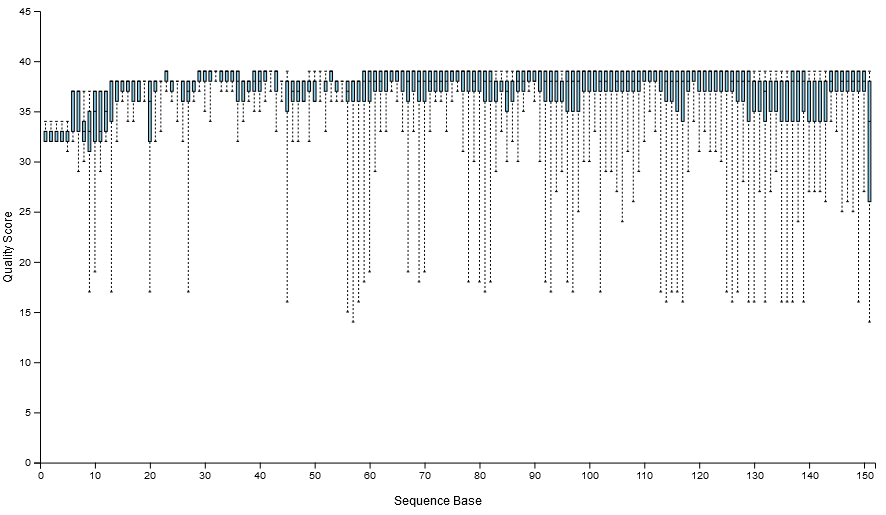

### Qualities look great. Will choose 150bp as the deblur sequence cutoff. This will let us compare features we find in our studies those found in others. The majority of datasets on QIITA are deblured to 150bp. There's also not a huge amount of information gained in the extra 100bp if we merged R1/R2 to get 250bp (see figure 1 from DOI: 10.1128/AEM.00062-07).

In [9]:
qiime deblur denoise-16S \
--i-demultiplexed-seqs demux-r1.qza \
--p-trim-length 150 \
--p-sample-stats \
--o-representative-sequences SHNW-gut-rep-seqs.qza \
--o-table SHNW-gut-table.qza \
--o-stats SHNW-gut-deblur-stats.qza \
--verbose \
--p-jobs-to-start 6

Saved FeatureTable[Frequency] to: table.qza
Saved FeatureData[Sequence] to: rep-seqs.qza
Saved DeblurStats to: deblur-stats.qza
(qiime2-2020.2) 

: 1

In [10]:
qiime feature-table tabulate-seqs \
--i-data SHNW-gut-rep-seqs.qza \
--o-visualization SHNW-gut-rep-seqs.qzv

Saved Visualization to: rep-seqs.qzv
(qiime2-2020.2) 

: 1

In [11]:
qiime feature-table summarize \
--i-table SHNW-gut-table.qza \
--o-visualization SHNW-gut-table.qzv

Saved Visualization to: SHNW-gut-table.qzv
(qiime2-2020.2) 

: 1

 ### Table summary
 
    Number of samples 	92
    Number of features 	8,483
    Total frequency 	7,740,835

                        Frequency
    Minimum frequency 	6.0
    1st quartile 	50,267.0
    Median frequency 	77,491.0
    3rd quartile 	113,561.25
    Maximum frequency 	349,258.0
    Mean frequency 	84,139.51086956522


### 10 samples with lowest # of reads:
    K15	10013
    E4-EBC4	155
    E3-EBC3	154
    E6-EBC6	93
    E9-EBC9	72
    E8-EBC8	43
    B12	42
    E5-EBC5	23
    W15	10
    E1-EBC1	6

### 5 most abundant and prevalent features:

                                        Frequency    # of Samples Observed In
    3c44df3672100a011a334b67eea24366 	279,556 	83
    dadb874cf55015dada2a22cc32c1eda9 	221,891 	82
    6234321dd90179936aa89249d23d256d 	165,345 	78
    ac57d463deafd198f817244255e80019 	137,292 	77
    8c6accdc08a5bcbdd15cc07420d92e2e 	123,096 	81

### Assign taxonomy using a naive bayesian classifier against the SILVA 132 v4 database:

In [ ]:
qiime feature-classifier classify-sklearn \
--i-reads SHNW-gut-rep-seqs.qza \
--i-classifier silva-132-99-515-806-nb-classifier.qza \
--o-classification SHNW-gut-SILVA-132.qza \
--p-n-jobs 24

In [8]:
qiime metadata tabulate \
--m-input-file SHNW-gut-SILVA-132.qza \
--o-visualization SHNW-gut-SILVA-132.qzv

Saved Visualization to: SILVA132.qzv
(qiime2-2020.2) 

: 1

### Create a phylogenetic tree using SEPP: 

In [ ]:
qiime fragment-insertion sepp \
--i-representative-sequences SHNW-gut-rep-seqs.qza \
--i-reference-database sepp-refs-silva-128.qza \
--o-tree SHNW-gut-sepp-tree.qza \
--o-placements SHNW-gut-sepp-placements.qza \
--verbose \
--p-threads 24 

### Filter out features that couldn't be inserted on tree:

In [3]:
qiime fragment-insertion filter-features \
  --i-table SHNW-gut-table.qza \
  --i-tree SHNW-gut-sepp-tree.qza \
  --o-filtered-table SHNW-gut-filtered_table.qza \
  --o-removed-table SHNW-gut-removed_table.qza \
  --verbose

Saved FeatureTable[Frequency] to: SHNW-gut-filtered_table.qza
Saved FeatureTable[Frequency] to: SHNW-gut-removed_table.qza
(qiime2-2020.2) 

: 1

In [4]:
qiime feature-table summarize \
--i-table SHNW-gut-removed_table.qza \
--o-visualization SHNW-gut-removed_table.qzv

Saved Visualization to: SHNW-gut-removed_table.qzv
(qiime2-2020.2) 

: 1

### Looks like nothing was removed, so will just use the unfiltered table (table.qza) for subsequent analyses.

### Run alpha-rarefaction analysis to see what a good sampling depth will be:

In [6]:
qiime diversity alpha-rarefaction \
--i-table SHNW-gut-table.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--o-visualization SHNW-gut-table-rarefaction.qzv \
--p-min-depth 500 \
--p-max-depth 50000

Saved Visualization to: SHNW-gut-table-rarefaction.qzv
(qiime2-2020.2) 

: 1

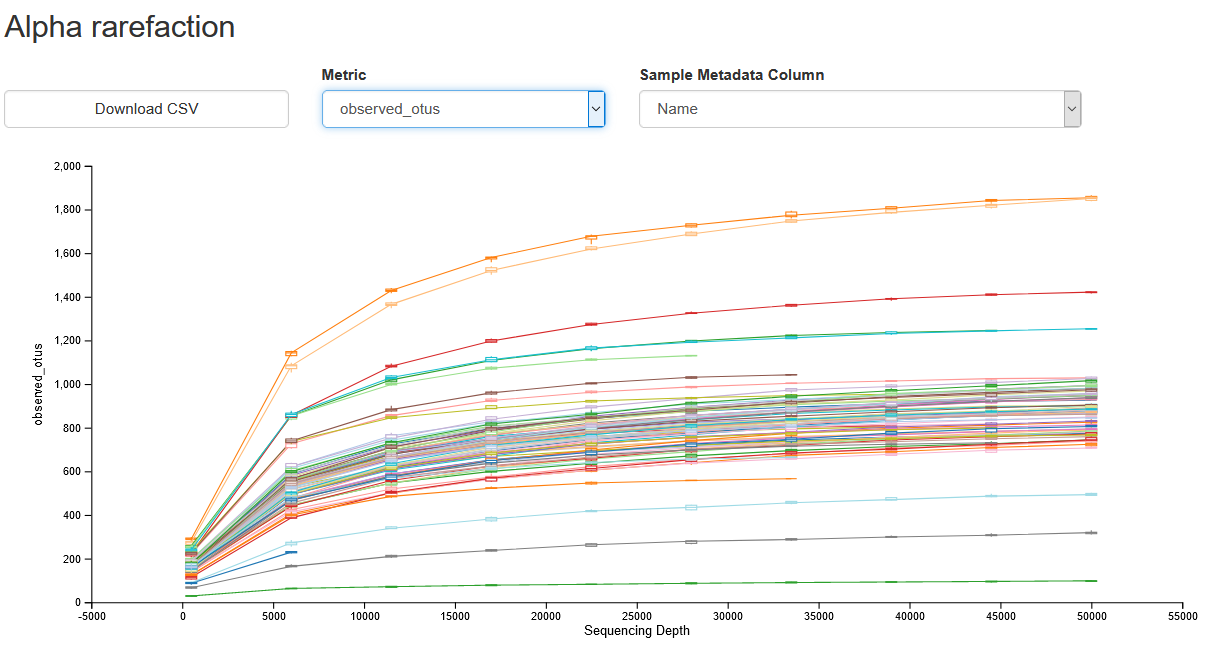

### Richness seems to plateau for most samples ~25k reads.

SILVA132.qza      qual.png             silva-132-99-515-806-nb-classifier.qza
deblur-stats.qza  rep-seqs.qza         table.qza
deblur.log        rep-seqs.qzv         table.qzv
demux-r1.qza      sepp-placements.qza
demux-r1.qzv      sepp-tree.qza
(qiime2-2020.2) 

: 1

### Remove the soil samples from the table -- we don't need them for further analyses:

In [9]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where "SampleType IN ('Soil', 'Control')" \
--p-exclude-ids \
--o-filtered-table SHNW-gut-table-no-soil.qza

Saved FeatureTable[Frequency] to: SHNW-gut-table-no-soil.qza
(qiime2-2020.2) 

: 1

### Remove samples with low #s of reads (<25,129):

In [10]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table-no-soil.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-min-frequency 25129 \
--o-filtered-table SHNW-gut-table-no-soil-at-least-25129-reads.qza

Saved FeatureTable[Frequency] to: SHNW-gut-table-no-soil-at-least-25129-reads.qza
(qiime2-2020.2) 

: 1

In [11]:
qiime feature-table summarize \
--i-table SHNW-gut-table-no-soil-at-least-25129-reads.qza \
--o-visualization SHNW-gut-table-no-soil-at-least-25129-reads.qzv

Saved Visualization to: SHNW-gut-table-no-soil-at-least-25129-reads.qzv
(qiime2-2020.2) 

: 1

### Samples removed:

    Ksoil	57671
    Bsoil	44302
    Wsoil	33548
    M10b	11363
    K15	10013
    E4-EBC4	155
    E3-EBC3	154
    E6-EBC6	93
    E9-EBC9	72
    E8-EBC8	43
    B12	42
    E5-EBC5	23
    W15	10
    E1-EBC1	6

### Create taxa barplots per individual sample:

In [12]:
qiime taxa barplot \
--i-table SHNW-gut-table-no-soil-at-least-25129-reads.qza \
--i-taxonomy SILVA132.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--o-visualization SHNW-gut-table-no-soil-at-least-25129-reads-BARPLOT-PER-SAMPLE.qzv

Saved Visualization to: SHNW-gut-table-no-soil-at-least-25129-reads-BARPLOT-PER-SAMPLE.qzv
(qiime2-2020.2) 

: 1

### Remove outlier samples, joey samples, multiple samples from the same individual, and contaminated sample from table (see SI Figures 1 and 2):
Outlier:
- B10
- B11
- B13
- B14
- B15
- B16
- B17

Joey:
- M6
- M14

Same individuals sampled from multiple days samples:
- M1b
- M1c
- M3b
- M4b
- M9b

Contaminated sample:
- M7b

In [13]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table-no-soil-at-least-25129-reads.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where  "name IN ('B10', 'B11', 'B13', 'B14', 'B15', 'B16', 'B17', 'M7b', 'M6', 'M14', 'M1b', 'M1c', 'M3b', 'M4b', 'M9b')" \
--p-exclude-ids \
--o-filtered-table SHNW-gut-table-final.qza

Saved FeatureTable[Frequency] to: SHNW-gut-table-final.qza
(qiime2-2020.2) 

: 1

In [14]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final.qza \
--o-visualization SHNW-gut-table-final.qzv

Saved Visualization to: SHNW-gut-table-final.qzv
(qiime2-2020.2) 

: 1

### Sample with lowest number of reads is now W7 (36,346)

### Create bar plots on final filtered table:

In [24]:
qiime taxa barplot \
--i-table SHNW-gut-table-final.qza \
--i-taxonomy SILVA132.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--o-visualization SHNW-gut-table-final-BARPLOT-PER-SAMPLE.qzv

Saved Visualization to: table-final-BARPLOT-PER-SAMPLE.qzv
(qiime2-2020.2) 

: 1

### Collapse samples by population, then make barplots

In [25]:
qiime feature-table group \
--i-table SHNW-gut-table-final.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Population \
--p-mode mean-ceiling \
--p-axis sample \
--o-grouped-table SHNW-gut-table-final-POPULATION.qza

Saved FeatureTable[Frequency] to: table-final-POPULATION.qza
(qiime2-2020.2) 

: 1

In [26]:
qiime taxa barplot \
--i-table SHNW-gut-table-final-POPULATION.qza \
--i-taxonomy SILVA132.qza \
--m-metadata-file SHNW_2019_Gut_Metadata_PPN.txt \
--o-visualization SHNW-gut-table-final-POPULATION-BARPLOT.qzv

Saved Visualization to: table-final-POPULATION-BARPLOT.qzv
(qiime2-2020.2) 

: 1

### Core diversity analyses using **36,346** as the rarefaction depth on the final filtered table:

In [3]:
qiime diversity core-metrics-phylogenetic \
--i-table SHNW-gut-table-final.qza \
--i-phylogeny SHNW-gut-sepp-tree.qza \
--p-sampling-depth 36346 \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--output-dir SHNW-gut-Core-metrics-final-filtered-table-36346

Saved FeatureTable[Frequency] to: SHNW-gut-Core-metrics-final-filtered-table-36346/rarefied_table.qza
Saved SampleData[AlphaDiversity] % Properties('phylogenetic') to: SHNW-gut-Core-metrics-final-filtered-table-36346/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: SHNW-gut-Core-metrics-final-filtered-table-36346/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: SHNW-gut-Core-metrics-final-filtered-table-36346/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: SHNW-gut-Core-metrics-final-filtered-table-36346/evenness_vector.qza
Saved DistanceMatrix % Properties('phylogenetic') to: SHNW-gut-Core-metrics-final-filtered-table-36346/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix % Properties('phylogenetic') to: SHNW-gut-Core-metrics-final-filtered-table-36346/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: SHNW-gut-Core-metrics-final-filtered-table-36346/jaccard_distance_matrix.qza
Saved DistanceMatrix to: SHNW-gut-Core-metrics-final-filt

: 1

In [4]:
for i in SHNW-gut-Core-metrics-final-filtered-table-36346/*vector.qza; do qiime diversity alpha-group-significance --i-alpha-diversity $i --m-metadata-file SHNW_2019_Gut_Metadata.txt --o-visualization ${i/.qza/.qzv}; done

Saved Visualization to: SHNW-gut-Core-metrics-final-filtered-table-36346/evenness_vector.qzv
Saved Visualization to: SHNW-gut-Core-metrics-final-filtered-table-36346/faith_pd_vector.qzv
Saved Visualization to: SHNW-gut-Core-metrics-final-filtered-table-36346/observed_otus_vector.qzv
Saved Visualization to: SHNW-gut-Core-metrics-final-filtered-table-36346/shannon_vector.qzv
(qiime2-2020.2) 

: 1

### PERMANOVA tests for microbial composition differences:

In [5]:
qiime diversity beta-group-significance \
--i-distance-matrix SHNW-gut-Core-metrics-final-filtered-table-36346/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Captive \
--o-visualization SHNW-gut-Core-metrics-final-filtered-table-36346/unweighted_unifrac_PERMANOVA.qzv \
--p-method permanova \
--p-pairwise

Saved Visualization to: SHNW-gut-Core-metrics-final-filtered-table-36346/unweighted_unifrac_PERMANOVA.qzv
(qiime2-2020.2) 

: 1

In [6]:
qiime diversity beta-group-significance \
--i-distance-matrix SHNW-gut-Core-metrics-final-filtered-table-36346/weighted_unifrac_distance_matrix.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Captive \
--o-visualization SHNW-gut-Core-metrics-final-filtered-table-36346/weighted_unifrac_PERMANOVA.qzv \
--p-method permanova \
--p-pairwise

Saved Visualization to: SHNW-gut-Core-metrics-final-filtered-table-36346/weighted_unifrac_PERMANOVA.qzv
(qiime2-2020.2) 

: 1

## ANCOM analysis to identify differentially abundant features:

### Remove low abundance/prevalence features

In [36]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final.qza \
--o-filtered-table SHNW-gut-table-final-FILTERED-ANCOM-ms8-mf500.qza \
--p-min-samples 8 \
--p-min-frequency 500

Saved FeatureTable[Frequency] to: table-final-FILTERED-ANCOM-ms8-mf200.qza
(qiime2-2020.2) 

: 1

In [37]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-FILTERED-ANCOM-ms8-mf500.qza \
--o-visualization SHNW-gut-table-final-FILTERED-ANCOM-ms8-mf500.qzv

Saved Visualization to: table-final-FILTERED-ANCOM-ms8-mf200.qzv
(qiime2-2020.2) 

: 1

In [38]:
qiime composition add-pseudocount \
--i-table SHNW-gut-table-final-FILTERED-ANCOM-ms8-mf500.qza \
--o-composition-table SHNW-gut-table-final-FILTERED-ANCOM-ms8-mf500-pseudo.qza

Saved FeatureTable[Composition] to: table-final-FILTERED-ANCOM-ms8-mf200-pseudo.qza
(qiime2-2020.2) 

: 1

In [39]:
qiime composition ancom \
--i-table SHNW-gut-table-final-FILTERED-ANCOM-ms8-mf500-pseudo.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Captive \
--o-visualization SHNW-gut-table-final-FILTERED-ANCOM-ms8-mf500-pseudo-CAPTIVE.qzv

Saved Visualization to: table-final-FILTERED-ANCOM-ms8-mf200-pseudo-CAPTIVE.qzv
(qiime2-2020.2) 

: 1

### ANCOM collapsed at family level (i.e. not at the feature level)

In [11]:
qiime taxa collapse \
--i-table SHNW-gut-table-final.qza \
--i-taxonomy SHNW-gut-SILVA-132.qza \
--p-level 5 \
--o-collapsed-table SHNW-gut-table-final-FAMILY.qza

Saved FeatureTable[Frequency] to: SHNW-gut-table-final-FAMILY.qza
(qiime2-2020.2) 

: 1

In [13]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-FAMILY.qza \
--o-filtered-table SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500.qza \
--p-min-samples 8 \
--p-min-frequency 500

Saved FeatureTable[Frequency] to: SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500.qza
(qiime2-2020.2) 

: 1

In [15]:
qiime composition add-pseudocount \
--i-table SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500.qza \
--o-composition-table SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo.qza

Saved FeatureTable[Composition] to: SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo.qza
(qiime2-2020.2) 

: 1

In [17]:
qiime composition ancom \
--i-table SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Captive \
--o-visualization SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo-CAPTIVE.qzv

Saved Visualization to: SHNW-gut-table-final-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo-CAPTIVE.qzv
(qiime2-2020.2) 

: 1

## Unique feature analysis:

### Separate main table to population-specific tables

In [37]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table-final.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where "[Captive]='Yes'" \
--o-filtered-table SHNW-gut-table-final-CAPTIVEonly.qza

Saved FeatureTable[Frequency] to: table-final-CAPTIVEonly.qza
(qiime2-2020.2) 

: 1

In [38]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-CAPTIVEonly.qza \
--o-visualization SHNW-gut-table-final-CAPTIVEonly.qzv

Saved Visualization to: table-final-CAPTIVEonly.qzv
(qiime2-2020.2) 

: 1

In [39]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table-final.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where "[Captive]='No'" \
--o-filtered-table SHNW-gut-table-final-WILDonly.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly.qza
(qiime2-2020.2) 

: 1

In [40]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly.qza \
--o-visualization SHNW-gut-table-final-WILDonly.qzv

Saved Visualization to: table-final-WILDonly.qzv
(qiime2-2020.2) 

: 1

# A foray into cross-sample contamination

### Hard to get exact read numbers per ASV per sample, so export to ye old school biom format:

In [4]:
qiime tools export \
--input-path table-final-CAPTIVEonly.qza \
--output-path table-final-CAPTIVEonly.biom

Exported table-final-CAPTIVEonly.qza as BIOMV210DirFmt to directory table-final-CAPTIVEonly.biom
(qiime2-2020.2) 

: 1

In [6]:
biom convert -i table-final-CAPTIVEonly.biom/feature-table.biom -o table-final-CAPTIVEonly.biom/feature-table.tsv --to-tsv

(qiime2-2020.2) 

: 1

### Pull out the EBCs to check if these abundant features spilled over into them as would be expected if cross-sample contamination was happening.

In [7]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where "SampleType IN ('Control')" \
--o-filtered-table SHNW-gut-table-EBCs-ONLY.qza

Saved FeatureTable[Frequency] to: SHNW-gut-table-EBCs-ONLY.qza
(qiime2-2020.2) 

: 1

In [8]:
qiime feature-table summarize \
--i-table SHNW-gut-table-EBCs-ONLY.qza \
--o-visualization SHNW-gut-table-EBCs-ONLY.qzv

Saved Visualization to: SHNW-gut-table-EBCs-ONLY.qzv
(qiime2-2020.2) 

: 1

### Looks like we do get spillover of the most abundant ASVs into the EBCs, as we would expect under the scenario that greater abundance = greater chance of cross-contamination.

### Remove features with fewer than 200 reads (0.00015% of total table frequency) and found in fewer than 3 samples. Rationale for 200 reads is to help mitigate effect of cross-well sample contamination. 
### The most abundant feature in the wild-only table is 3c44df3672100a011a334b67eea24366, with a frequency of 278,742 (total table frequency 5,026,870) or 5.5% of total wild-only table abundance. 
### This feature is found in the captive-only table with a frequency of only 131 (total table frequency 1,292,572) or 0.0001% of total captive-only table abundance. 
### At least present in 3 samples because I'm interested in populations here.

In [41]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-CAPTIVEonly.qza \
--o-filtered-table SHNW-gut-table-final-CAPTIVEonly-ms3-mf200.qza \
--p-min-samples 3 \
--p-min-frequency 200

Saved FeatureTable[Frequency] to: table-final-CAPTIVEonly-ms3-mf200.qza
(qiime2-2020.2) 

: 1

In [42]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-CAPTIVEonly-ms3-mf200.qza \
--o-visualization SHNW-gut-table-final-CAPTIVEonly-ms3-mf200.qzv

Saved Visualization to: table-final-CAPTIVEonly-ms3-mf200.qzv
(qiime2-2020.2) 

: 1

### pre-filter:
    Number of features 	2,618
    Total frequency 	1,292,572
### post-filter:
    Number of features 	550
    Total frequency 	1,107,746

### Filtering the wild-only table. Using a min-frequency of 750 to keep it the same filter % as the captive only table, as the wild-only table has a greater total frequency..

In [45]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly.qza \
--o-filtered-table SHNW-gut-table-final-WILDonly-ms3-mf750.qza \
--p-min-samples 3 \
--p-min-frequency 750

Saved FeatureTable[Frequency] to: table-final-WILDonly-ms3-mf750.qza
(qiime2-2020.2) 

: 1

In [46]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-ms3-mf750.qza \
--o-visualization SHNW-gut-table-final-WILDonly-ms3-mf750.qzv

Saved Visualization to: table-final-WILDonly-ms3-mf750.qzv
(qiime2-2020.2) 

: 1

### pre-filter
    Number of features 	3,096
    Total frequency 	5,026,870
### post-filter
    Number of features 	642
    Total frequency 	4,729,528

### Filter captive/wild-specific features from tables to look at total abundance of captive/wild-specific features

In [49]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly.qza \
--m-metadata-file WILD-only.txt \
--o-filtered-table SHNW-gut-table-final-WILDonly-WILD-SPECIFIC.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-WILD-SPECIFIC.qza
(qiime2-2020.2) 

: 1

In [50]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-WILD-SPECIFIC.qza \
--o-visualization SHNW-gut-table-final-WILDonly-WILD-SPECIFIC.qzv

Saved Visualization to: table-final-WILDonly-WILD-SPECIFIC.qzv
(qiime2-2020.2) 

: 1

#### Total frequency in wild-only table = 4,729,528
#### Total frequency of wild-specific features = 3,370,268
### 71.3%

In [51]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-CAPTIVEonly.qza \
--m-metadata-file CAPTIVE-only.txt \
--o-filtered-table SHNW-gut-table-final-CAPTIVEonly-CAPTIVE-SPECIFIC.qza

Saved FeatureTable[Frequency] to: table-final-CAPTIVEonly-CAPTIVE-SPECIFIC.qza
(qiime2-2020.2) 

: 1

In [52]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-CAPTIVEonly-CAPTIVE-SPECIFIC.qza \
--o-visualization SHNW-gut-table-final-CAPTIVEonly-CAPTIVE-SPECIFIC.qzv

Saved Visualization to: table-final-CAPTIVEonly-CAPTIVE-SPECIFIC.qzv
(qiime2-2020.2) 

: 1

#### Total frequency in captive table = 1,107,746
#### Total frequency of captive-specific features = 816,701
### 73.7%

## Core microbiome analysis:

In [3]:
qiime feature-table core-features \
--i-table SHNW-gut-table-final-WILDonly-ms3-mf750.qza \
--o-visualization SHNW-gut-table-final-WILDonly-ms3-mf750-CORE-FEATURES.qzv

Saved Visualization to: table-final-WILDonly-ms3-mf750-CORE-FEATURES.qzv
(qiime2-2020.2) 

: 1

In [4]:
qiime feature-table core-features \
--i-table SHNW-gut-table-final-CAPTIVEonly-ms3-mf200.qza \
--o-visualization SHNW-gut-table-final-CAPTIVEonly-ms3-mf20-CORE-FEATURES.qzv

Saved Visualization to: table-final-CAPTIVEonly-ms3-mf20-CORE-FEATURES.qzv
(qiime2-2020.2) 

: 1

### Merge filtered tables to look for core microbiome accross all wombats (i.e. captive and wild)

In [19]:
qiime feature-table merge \
--i-tables SHNW-gut-table-final-CAPTIVEonly-ms3-mf200.qza SHNW-gut-table-final-WILDonly-ms3-mf750.qza \
--o-merged-table SHNW-gut-table-final-FILTERED-MERGED.qza

Saved FeatureTable[Frequency] to: SHNW-gut-table-final-FILTERED-MERGED.qza
(qiime2-2020.2) 

: 1

In [20]:
qiime feature-table core-features \
--i-table SHNW-gut-table-final-FILTERED-MERGED.qza \
--o-visualization SHNW-gut-table-final-FILTERED-MERGED-CORE-FEATURES.qzv

Saved Visualization to: SHNW-gut-table-final-FILTERED-MERGED-CORE-FEATURES.qzv
(qiime2-2020.2) 

: 1

### Pull out a list of features from each of the core microbiota tables to filter the main tables from (to work out abundance of the core microbiota):

In [ ]:
for i in *.tsv; do awk '{print $1}' $i > ${i/.tsv/-FEATURES.tsv}; done

In [24]:
for i in *.tsv; do sed -i'' 's/Feature/feature id/g' $i; done

(qiime2-2020.2) 

: 1

In [25]:
for i in *ALL*.tsv; do qiime feature-table filter-features --i-table SHNW-gut-table-final-FILTERED-MERGED.qza --m-metadata-file $i --o-filtered-table ${i/.tsv/.qza}; done

Saved FeatureTable[Frequency] to: core-features-ALL-0.900-FEATURES.qza
Saved FeatureTable[Frequency] to: core-features-ALL-1.000-FEATURES.qza
(qiime2-2020.2) 

: 1

In [26]:
for i in *captive*.tsv; do qiime feature-table filter-features --i-table SHNW-gut-table-final-CAPTIVEonly-ms3-mf200.qza --m-metadata-file $i --o-filtered-table ${i/.tsv/.qza}; done

Saved FeatureTable[Frequency] to: core-features-captive-0.900-FEATURES.qza
Saved FeatureTable[Frequency] to: core-features-captive-1.000-FEATURES.qza
(qiime2-2020.2) 

: 1

In [27]:
for i in *WILD*.tsv; do qiime feature-table filter-features --i-table SHNW-gut-table-final-WILDonly-ms3-mf750.qza --m-metadata-file $i --o-filtered-table ${i/.tsv/.qza}; done

Saved FeatureTable[Frequency] to: core-features-WILD-0.900-FEATURES.qza
Saved FeatureTable[Frequency] to: core-features-WILD-1.000-FEATURES.qza
(qiime2-2020.2) 

: 1

In [28]:
for i in *FEATURE*.qza; do qiime feature-table summarize --i-table $i --o-visualization ${i/.qza/.qzv}; done

Saved Visualization to: core-features-ALL-0.900-FEATURES.qzv
Saved Visualization to: core-features-ALL-1.000-FEATURES.qzv
Saved Visualization to: core-features-WILD-0.900-FEATURES.qzv
Saved Visualization to: core-features-WILD-1.000-FEATURES.qzv
Saved Visualization to: core-features-captive-0.900-FEATURES.qzv
Saved Visualization to: core-features-captive-1.000-FEATURES.qzv
(qiime2-2020.2) 

: 1

# Wild sample analyses

In [11]:
qiime diversity core-metrics-phylogenetic \
--i-table SHNW-gut-table-final-WILDonly.qza \
--i-phylogeny SHNW-gut-sepp-tree.qza \
--p-sampling-depth 36346 \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--output-dir SHNW-gut-Core-metrics-final-filtered-table-36346-WILDonly

Saved FeatureTable[Frequency] to: Core-metrics-final-filtered-table-36346-WILDonly/rarefied_table.qza
Saved SampleData[AlphaDiversity] % Properties('phylogenetic') to: Core-metrics-final-filtered-table-36346-WILDonly/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: Core-metrics-final-filtered-table-36346-WILDonly/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: Core-metrics-final-filtered-table-36346-WILDonly/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: Core-metrics-final-filtered-table-36346-WILDonly/evenness_vector.qza
Saved DistanceMatrix % Properties('phylogenetic') to: Core-metrics-final-filtered-table-36346-WILDonly/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix % Properties('phylogenetic') to: Core-metrics-final-filtered-table-36346-WILDonly/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Core-metrics-final-filtered-table-36346-WILDonly/jaccard_distance_matrix.qza
Saved DistanceMatrix to: Core-metrics-final-filtered-tabl

: 1

In [12]:
for i in SHNW-gut-Core-metrics-final-filtered-table-36346-WILDonly/*vector.qza; do qiime diversity alpha-group-significance --i-alpha-diversity $i --m-metadata-file SHNW_2019_Gut_Metadata.txt --o-visualization ${i/.qza/.qzv}; done

Saved Visualization to: Core-metrics-final-filtered-table-36346-WILDonly/evenness_vector.qzv
Saved Visualization to: Core-metrics-final-filtered-table-36346-WILDonly/faith_pd_vector.qzv
Saved Visualization to: Core-metrics-final-filtered-table-36346-WILDonly/observed_otus_vector.qzv
Saved Visualization to: Core-metrics-final-filtered-table-36346-WILDonly/shannon_vector.qzv
(qiime2-2020.2) 

: 1

### PERMANOVA tests for microbial composition differences:

In [13]:
qiime diversity beta-group-significance \
--i-distance-matrix SHNW-gut-Core-metrics-final-filtered-table-36346-WILDonly/unweighted_unifrac_distance_matrix.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Population \
--o-visualization SHNW-gut-Core-metrics-final-filtered-table-36346-WILDonly/unweighted_unifrac_PERMANOVA.qzv \
--p-method permanova \
--p-pairwise

Saved Visualization to: Core-metrics-final-filtered-table-36346-WILDonly/unweighted_unifrac_PERMANOVA.qzv
(qiime2-2020.2) 

: 1

In [14]:
qiime diversity beta-group-significance \
--i-distance-matrix SHNW-gut-Core-metrics-final-filtered-table-36346-WILDonly/weighted_unifrac_distance_matrix.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Population \
--o-visualization SHNW-gut-Core-metrics-final-filtered-table-36346-WILDonly/weighted_unifrac_PERMANOVA.qzv \
--p-method permanova \
--p-pairwise

Saved Visualization to: Core-metrics-final-filtered-table-36346-WILDonly/weighted_unifrac_PERMANOVA.qzv
(qiime2-2020.2) 

: 1

## ANCOM analysis to identify differentially abundant features:

### Remove low abundance/prevalence features

In [32]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly.qza \
--o-filtered-table SHNW-gut-table-final-WILDonly-FILTERED-ANCOM-ms8-mf500.qza \
--p-min-samples 8 \
--p-min-frequency 500

Saved FeatureTable[Frequency] to: table-final-WILDonly-FILTERED-ANCOM-ms8-mf2000.qza
(qiime2-2020.2) 

: 1

In [33]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-FILTERED-ANCOM-ms8-mf500.qza \
--o-visualization SHNW-gut-table-final-WILDonly-FILTERED-ANCOM-ms8-mf500.qzv

Saved Visualization to: table-final-WILDonly-FILTERED-ANCOM-ms8-mf2000.qzv
(qiime2-2020.2) 

: 1

In [34]:
qiime composition add-pseudocount \
--i-table SHNW-gut-table-final-WILDonly-FILTERED-ANCOM-ms8-mf500.qza \
--o-composition-table SHNW-gut-table-final-WILDonly-FILTERED-ANCOM-ms8-mf500-pseudo.qza

Saved FeatureTable[Composition] to: table-final-WILDonly-FILTERED-ANCOM-ms8-mf2000-pseudo.qza
(qiime2-2020.2) 

: 1

In [35]:
qiime composition ancom \
--i-table SHNW-gut-table-final-WILDonly-FILTERED-ANCOM-ms8-mf500-pseudo.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Population \
--o-visualization SHNW-gut-table-final-WILDonly-FILTERED-ANCOM-ms8-mf500-pseudo-POPULATION.qzv

Saved Visualization to: table-final-WILDonly-FILTERED-ANCOM-ms8-mf2000-pseudo-POPULATION.qzv
(qiime2-2020.2) 

: 1

### ANCOM collapsed at family level (i.e. not at the feature level)

In [29]:
qiime taxa collapse \
--i-table SHNW-gut-table-final-WILDonly.qza \
--i-taxonomy SHNW-gut-SILVA-132.qza \
--p-level 5 \
--o-collapsed-table SHNW-gut-table-final-WILDonly-FAMILY.qza

Saved FeatureTable[Frequency] to: SHNW-gut-table-final-WILDonly-FAMILY.qza
(qiime2-2020.2) 

: 1

In [30]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-FAMILY.qza \
--o-filtered-table SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500.qza \
--p-min-samples 8 \
--p-min-frequency 500

Saved FeatureTable[Frequency] to: SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500.qza
(qiime2-2020.2) 

: 1

In [31]:
qiime composition add-pseudocount \
--i-table SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500.qza \
--o-composition-table SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo.qza

Saved FeatureTable[Composition] to: SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo.qza
(qiime2-2020.2) 

: 1

In [32]:
qiime composition ancom \
--i-table SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--m-metadata-column Population \
--o-visualization SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo-POPULATION.qzv

Saved Visualization to: SHNW-gut-table-final-WILDonly-FAMILY-FILTERED-ANCOM-ms8-mf500-pseudo-POPULATION.qzv
(qiime2-2020.2) 

: 1

### Split samples into population-specific tables:

In [5]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table-final-WILDonly.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where "[Population]='Wonga'" \
--o-filtered-table SHNW-gut-table-final-WILDonly-Wonga.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Wonga.qza
(qiime2-2020.2) 

: 1

In [8]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Wonga.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Wonga.qzv

Saved Visualization to: table-final-WILDonly-Wonga.qzv
(qiime2-2020.2) 

: 1

In [6]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table-final-WILDonly.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where "[Population]='Kooloola'" \
--o-filtered-table SHNW-gut-table-final-WILDonly-Kooloola.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Kooloola.qza
(qiime2-2020.2) 

: 1

In [9]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Kooloola.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Kooloola.qzv

Saved Visualization to: table-final-WILDonly-Kooloola.qzv
(qiime2-2020.2) 

: 1

In [7]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table-final-WILDonly.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where "[Population]='Brookfield'" \
--o-filtered-table SHNW-gut-table-final-WILDonly-Brookfield.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Brookfield.qza
(qiime2-2020.2) 

: 1

In [10]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Brookfield.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Brookfield.qzv

Saved Visualization to: table-final-WILDonly-Brookfield.qzv
(qiime2-2020.2) 

: 1

### Again, filter features from each table with a per-table frequency of < 0.00015%, and fewer than 3 samples.

In [41]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-Brookfield.qza \
--o-filtered-table SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147.qza \
--p-min-samples 3 \
--p-min-frequency 147

Saved FeatureTable[Frequency] to: table-final-WILDonly-Brookfield-ms3-mf147.qza
(qiime2-2020.2) 

: 1

In [42]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147.qzv

Saved Visualization to: table-final-WILDonly-Brookfield-ms3-mf147.qzv
(qiime2-2020.2) 

: 1

### pre-filter
    Number of samples 	9
    Number of features 	1,897
    Total frequency 	980,523
### post-filter
    Number of samples 	9
    Number of features 	498
    Total frequency 	928,796

In [43]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-Kooloola.qza \
--o-filtered-table SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245.qza \
--p-min-samples 3 \
--p-min-frequency 245

Saved FeatureTable[Frequency] to: table-final-WILDonly-Kooloola-ms3-mf245.qza
(qiime2-2020.2) 

: 1

In [44]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245.qzv

Saved Visualization to: table-final-WILDonly-Kooloola-ms3-mf245.qzv
(qiime2-2020.2) 

: 1

### pre-filter
    Number of samples 	20
    Number of features 	2,281
    Total frequency 	1,635,208
### post-filter
    Number of samples 	20
    Number of features 	587
    Total frequency 	1,548,744

In [45]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-Wonga.qza \
--o-filtered-table SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361.qza \
--p-min-samples 3 \
--p-min-frequency 361

Saved FeatureTable[Frequency] to: table-final-WILDonly-Wonga-ms3-mf361.qza
(qiime2-2020.2) 

: 1

In [46]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361.qzv

Saved Visualization to: table-final-WILDonly-Wonga-ms3-mf361.qzv
(qiime2-2020.2) 

: 1

### pre-filter
    Number of samples 	22
    Number of features 	2,393
    Total frequency 	2,411,139
### post-filter
    Number of samples 	22
    Number of features 	553
    Total frequency 	2,288,425

In [19]:
qiime feature-table core-features \
--i-table SHNW-gut-table-no-soil-at-least-25129-reads-outliers-removed-WILDonly.qza \
--o-visualization SHNW-gut-table-no-soil-at-least-25129-reads-outliers-removed-WILDonly-CORE-FEATURES.qzv

Saved Visualization to: table-no-soil-at-least-25129-reads-outliers-removed-WILDonly-CORE-FEATURES.qzv
(qiime2-2020.2) 

: 1

### Filter population-specific features from tables to look at total abundance of population-specific features

In [5]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361.qza \
--m-metadata-file Wonga-only.txt \
--o-filtered-table SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC.qza
(qiime2-2020.2) 

: 1

In [6]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC.qzv

Saved Visualization to: table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC.qzv
(qiime2-2020.2) 

: 1

#### Total frequency in Wonga table = 2,288,425
#### Total frequency of Wonga-specific features = 249,847
### 10.9%

In [9]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245.qza \
--m-metadata-file Kooloola-only.txt \
--o-filtered-table SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC.qza
(qiime2-2020.2) 

: 1

In [10]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC.qzv

Saved Visualization to: table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC.qzv
(qiime2-2020.2) 

: 1

#### Total frequency in Kooloola table = 1,548,744
#### Total frequency of Kooloola-specific features = 117,404
### 7.6%

In [11]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147.qza \
--m-metadata-file Brookfield-only.txt \
--o-filtered-table SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC.qza
(qiime2-2020.2) 

: 1

In [12]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC.qzv

Saved Visualization to: table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC.qzv
(qiime2-2020.2) 

: 1

#### Total frequency in Brookfield table = 928,796
#### Total frequency of Brookfield-specific features = 37,753
### 4%

### Brookfield AND Kooloola specific features:

In [35]:
qiime feature-table merge \
--i-tables SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147.qza table-final-WILDonly-Kooloola-ms3-mf245.qza \
--o-merged-table SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Brookfield-AND-Kooloola.qza
(qiime2-2020.2) 

: 1

In [36]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola.qzv

Saved Visualization to: table-final-WILDonly-Brookfield-AND-Kooloola.qzv
(qiime2-2020.2) 

: 1

In [37]:
qiime feature-table filter-features \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola.qza \
--m-metadata-file Kooloola-and-Brookfield-only.txt \
--o-filtered-table SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC.qza
(qiime2-2020.2) 

: 1

In [38]:
qiime feature-table summarize \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC.qza \
--o-visualization SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC.qzv

Saved Visualization to: table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC.qzv
(qiime2-2020.2) 

: 1

#### Total frequency in Brookfield AND Kooloola table = 2,477,540
#### Total frequency of Brookfield AND Kooloola-specific features = 346,106
### 14%

### Make taxa barplots of these population-specific microbes:

In [41]:
qiime feature-table group \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC.qza \
--m-metadata-file SHNW_2019_Gut_Metadata_habitat.txt \
--m-metadata-column Habitat \
--p-mode mean-ceiling \
--p-axis sample \
--o-grouped-table SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC-COLLAPSED.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC-COLLAPSED.qza
(qiime2-2020.2) 

: 1

In [42]:
qiime feature-table group \
--i-table SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC.qza \
--m-metadata-file SHNW_2019_Gut_Metadata_habitat.txt \
--m-metadata-column Population \
--p-mode mean-ceiling \
--p-axis sample \
--o-grouped-table SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC-COLLAPSED.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC-COLLAPSED.qza
(qiime2-2020.2) 

: 1

In [43]:
qiime feature-table group \
--i-table SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC.qza \
--m-metadata-file SHNW_2019_Gut_Metadata_habitat.txt \
--m-metadata-column Population \
--p-mode mean-ceiling \
--p-axis sample \
--o-grouped-table SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC-COLLASPED.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC-COLLASPED.qza
(qiime2-2020.2) 

: 1

In [44]:
qiime feature-table group \
--i-table SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC.qza \
--m-metadata-file SHNW_2019_Gut_Metadata_habitat.txt \
--m-metadata-column Population \
--p-mode mean-ceiling \
--p-axis sample \
--o-grouped-table SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC-COLLAPSED.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC-COLLAPSED.qza
(qiime2-2020.2) 

: 1

In [47]:
qiime feature-table merge \
--i-tables SHNW-gut-table-final-WILDonly-Wonga-ms3-mf361-WONGA-SPECIFIC-COLLAPSED.qza SHNW-gut-table-final-WILDonly-Kooloola-ms3-mf245-KOOLOOLA-SPECIFIC-COLLASPED.qza SHNW-gut-table-final-WILDonly-Brookfield-ms3-mf147-BROOKFIELD-SPECIFIC-COLLAPSED.qza SHNW-gut-table-final-WILDonly-Brookfield-AND-Kooloola-SPECIFIC-COLLAPSED.qza \
--o-merged-table SHNW-gut-table-final-WILDonly-POPULATION-SPECIFIC-COLLASPED.qza

Saved FeatureTable[Frequency] to: table-final-WILDonly-POPULATION-SPECIFIC-COLLASPED.qza
(qiime2-2020.2) 

: 1

In [48]:
qiime taxa barplot \
--i-table SHNW-gut-table-final-WILDonly-POPULATION-SPECIFIC-COLLASPED.qza \
--i-taxonomy SILVA132.qza \
--m-metadata-file SHNW_2019_Gut_Metadata_PPN.txt \
--o-visualization SHNW-gut-table-final-WILDonly-POPULATION-SPECIFIC-COLLASPED-BARPLOT.qzv

Saved Visualization to: table-final-WILDonly-POPULATION-SPECIFIC-COLLASPED-BARPLOT.qzv
(qiime2-2020.2) 

: 1

# SourceTracker2 analysis -- is soil the source of some gut microbes from wild SHNWs?

In [ ]:
conda activate st2

Filter intial table; remove samples with <25,000 reads ('M10b', 'K15', 'B12', 'W15'), outlier samples ('B10', 'B11', 'B13', 'B14', 'B15', 'B16', 'B17', 'M7b', 'M6', 'M14'), and captive samples (Mx).

In [4]:
qiime feature-table filter-samples \
--i-table SHNW-gut-table.qza \
--m-metadata-file SHNW_2019_Gut_Metadata.txt \
--p-where  "name IN ('B10', 'B11', 'B13', 'B14', 'B15', 'B16', 'B17', 'M7b', 'M6', 'M14', 'M10b', 'K15', 'B12', 'W15', 'M1a', 'M1b', 'M1c', 'M2', 'M3a', 'M3b', 'M4a', 'M4b', 'M5', 'M6', 'M7a', 'M7b', 'M8', 'M9a', 'M9b', 'M10a', 'M10b', 'M11', 'M12', 'M13', 'M14')" \
--p-exclude-ids \
--o-filtered-table SHNW-gut-table-for-st2.qza

Saved FeatureTable[Frequency] to: table-for-st2.qza
(qiime2-2020.2) 

: 1

In [5]:
qiime feature-table summarize \
--i-table tSHNW-gut-able-for-st2.qza \
--o-visualization SHNW-gut-table-for-st2.qzv

Saved Visualization to: table-for-st2.qzv
(qiime2-2020.2) 

: 1

In [6]:
qiime tools export \
--input-path SHNW-gut-table-for-st2.qza \
--output-path SHNW-gut-table-for-st2.biom

Exported table-for-st2.qza as BIOMV210DirFmt to directory table-for-st2.biom
(qiime2-2020.2) 

: 1

In [ ]:
sourcetracker2 gibbs \
-i SHNW-gut-table-for-st2.biom/feature-table.biom \
-m SHNW_2019_Gut_ST.txt \
-o ST-analysis

    Answer: no, very minimal <0.0001 % coming from soils